In [1]:
import sys
from pathlib import Path

In [8]:
from ethicml.algorithms.inprocess import GPyT, GPyTDemPar, GPyTEqOdds, LR, SVM, Agarwal, Kamiran, Kamishima, LR, ZafarEqOpp
from ethicml.evaluators import evaluate_models, CrossValidator, run_metrics
from ethicml.data import Compas, Adult, load_data, Toy
from ethicml.metrics import Accuracy, ProbPos, TPR, TNR, AbsCV
from ethicml.preprocessing import train_test_split
from ethicml.visualisation import plot_mean_std_box

In [3]:
# YOU DON'T HAVE TO UNDERSTAND THE CODE IN THIS CELL
# we only tell the model where the "run.py" is and where the python executable is
code_dir = Path('..')
def gp(**kwargs):
    return GPyT(code_dir=code_dir, **kwargs)
def gp_dp(**kwargs):
    return GPyTDemPar(code_dir=code_dir, **kwargs)
def gp_eo(**kwargs):
    return GPyTEqOdds(code_dir=code_dir, **kwargs)

In [4]:
# tnr_race_False = 0.724
# tnr_race_True = 0.702
# tnr_sex_True = 0.724
# tnr_sex_False = 0.744
tnr_in_true_race = 0.71
tnr_in_false_race = 0.74
tnr_in_true_sex = 0.72
tnr_in_false_sex = 0.77

In [11]:
# specify flags for GP
gp_flags = dict(epochs=71, length_scale=1.21, use_loo=False, iso=False, mean='ZeroMean', cov='RBFKernel')

In [12]:
algos = []

algos += [gp(s_as_input=True, flags=gp_flags)]
algos += [gp(s_as_input=False, flags=gp_flags)]
# algos += [gp_dp(epochs=70, s_as_input=True)]
for tpr in [0.7]:
    algos += [gp_eo(s_as_input=True, tnr1=tnr_in_true_race, tnr0=tnr_in_true_race, tpr0=tpr, tpr1=tpr, flags=gp_flags)]
    algos += [gp_eo(s_as_input=False, tnr1=tnr_in_false_race, tnr0=tnr_in_false_race, tpr0=tpr, tpr1=tpr, flags=gp_flags)]

baselines = [
    LR(),
    SVM(),
#     Agarwal(fairness="EqOd"),
#     Kamiran(),
#     Kamishima(),
    ZafarEqOpp(),
]
algos += baselines

In [13]:
data = [
#     Compas("Race"),
    Compas("Sex"),
#     Adult("Race"),
#     Adult("Sex"),
]

In [16]:
results = evaluate_models(
    datasets=[Toy()],
    inprocess_models=algos,
    metrics=[Accuracy(), ProbPos(), TPR(), TNR()],
    per_sens_metrics=[ProbPos(), TPR(), TNR()], 
    repeats=5,
    delete_prev=True,  # delete previous results
)
results

 37%|███▋      | 13/35 [01:24<02:22,  6.49s/it, model=ZafarEqOpp, τ=5.0, μ=1.2, dataset=Toy, transform=no_transform, repeat=1]                                   Task exception was never retrieved
future: <Task finished coro=<GPyTEqOdds.run_async() done, defined at /mnt/archive/fairness/py_env/lib/python3.6/site-packages/ethicml/algorithms/inprocess/fair_gpyt.py:253> exception=RuntimeError("The script failed. Supplied arguments: ['../run.py', '--inf', 'Variational', '--data', 'sensitive_from_numpy', '--dataset_path', '/tmp/tmpza6du9kk/data.npz', '--cov', 'RBFKernel', '--mean', 'ZeroMean', '--optimizer', 'Adam', '--lr', '0.05', '--model_name', 'local', '--batch_size', '1600', '--epochs', '70', '--eval_epochs', '100000', '--summary_steps', '100000', '--chkpt_epochs', '100000', '--save_dir', '/tmp/tmpza6du9kk', '--plot', '', '--logging_steps', '1', '--gpus', '0', '--preds_path', 'predictions.npz', '--num_samples', '20', '--optimize_inducing', 'True', '--length_scale', '1.2', '--sf', '1.0',

Accuracy  \
dataset transform    model                                              repeat              
Toy     no_transform GPyT_in_True                                       0-2410     0.8825   
                     GPyT_in_False                                      0-2410     0.8850   
                     GPyT_eq_odds_in_True_0tnr_0.71_1tnr_0.71_0tpr_0... 0-2410     0.8550   
                     GPyT_eq_odds_in_False_0tnr_0.74_1tnr_0.74_0tpr_... 0-2410     0.8750   
                     Logistic Regression, C=1.0                         0-2410     0.8850   
                     SVM                                                0-2410     0.8900   
                     ZafarEqOpp, τ=5.0, μ=1.2                           0-2410     0.8400   
                     GPyT_in_True                                       1-4820     0.8700   
                     GPyT_in_False                                      1-4820     0.8675   
                     GPyT_eq_odds_in_True_0tnr_0.71_1tnr_0.71_0tpr_0... 1-4820     0.8400   
                     GPyT_eq_odds_in_False_0tnr_0.74_1tnr_0.74_0tpr_... 1-4820     0.8625   
                     Logistic Regression, C=1.0                         1-4820     0.8625   
                     SVM                                                1-4820     0.8750   
                     ZafarEqOpp, τ=5.0, μ=1.2                           1-4820     0.8025   
                     GPyT_in_True                                       2-7230     0.9000   
                     GPyT_in_False                                      2-7230     0.8825   
                     GPyT_eq_odds_in_True_0tnr_0.71_1tnr_0.71_0tpr_0... 2-7230     0.8600   
                     GPyT_eq_odds_in_False_0tnr_0.74_1tnr_0.74_0tpr_... 2-7230     0.8800   
                     Logistic Regression, C=1.0                         2-7230     0.8875   
                     SVM                                                2-7230     0.8925   
                     ZafarEqOpp, τ=5.0, μ=1.2                           2-7230     0.8300   
                     GPyT_in_True                                       3-9640     0.8600   
                     GPyT_in_False                                      3-9640     0.8550   
                     GPyT_eq_odds_in_True_0tnr_0.71_1tnr_0.71_0tpr_0... 3-9640     0.8550   
                     GPyT_eq_odds_in_False_0tnr_0.74_1tnr_0.74_0tpr_... 3-9640     0.8675   
                     Logistic Regression, C=1.0                         3-9640     0.8525   
                     SVM                                                3-9640     0.8550   
                     ZafarEqOpp, τ=5.0, μ=1.2                           3-9640     0.8275   
                     GPyT_in_True                                       4-12050    0.8350   
                     GPyT_in_False                                      4-12050    0.8450   
                     GPyT_eq_odds_in_True_0tnr_0.71_1tnr_0.71_0tpr_0... 4-12050    0.8525   
                     GPyT_eq_odds_in_False_0tnr_0.74_1tnr_0.74_0tpr_... 4-12050    0.8200   
                     Logistic Regression, C=1.0                         4-12050    0.8550   
                     SVM                                                4-12050    0.8400   
                     ZafarEqOpp, τ=5.0, μ=1.2                           4-12050    0.7875   

                                                                                      TNR  \
dataset transform    model                                              repeat              
Toy     no_transform GPyT_in_True                                       0-2410   0.899471   
                     GPyT_in_False                                      0-2410   0.899471   
                     GPyT_eq_odds_in_True_0tnr_0.71_1tnr_0.71_0tpr_0... 0-2410   0.888889   
                     GPyT_eq_odds_in_False_0tnr_0.74_1tnr_0.74_0tpr_... 0-2410   0.888889   
                     Logistic Regression, C=1.0                         0-2410   

In [17]:
# figs_plots = plot_mean_std_box(results.iloc[13:22], Accuracy(), "TPR")#_race_0/race_1")
figs_plots = plot_mean_std_box(results, "Accuracy", "TPR_sex_0/sex_1", save=True)
figs_plots[0][0]

ValueError: No matching columns found for either TPR_sex_0/sex_1 or Accuracy

In [9]:
train, test = train_test_split(load_data(Adult()))

In [10]:
# Fair grid search
primary = Accuracy()
fair_measure = AbsCV()
hyperparams = dict(C=[1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])
lr_cv = CrossValidator(LR, hyperparams, folds=5)
lr_cv.run(train, measures=[primary, fair_measure])
lr_cv.best_hyper_params(primary)

fold_0_model_Logistic Regression, C=1_completed
fold_0_model_Logistic Regression, C=0.1_completed
fold_0_model_Logistic Regression, C=0.01_completed
fold_0_model_Logistic Regression, C=0.001_completed
fold_0_model_Logistic Regression, C=0.0001_completed
fold_0_model_Logistic Regression, C=1e-05_completed
fold_0_model_Logistic Regression, C=1e-06_completed
fold_0_model_Logistic Regression, C=1e-07_completed
fold_1_model_Logistic Regression, C=1_completed
fold_1_model_Logistic Regression, C=0.1_completed
fold_1_model_Logistic Regression, C=0.01_completed
fold_1_model_Logistic Regression, C=0.001_completed
fold_1_model_Logistic Regression, C=0.0001_completed
fold_1_model_Logistic Regression, C=1e-05_completed
fold_1_model_Logistic Regression, C=1e-06_completed
fold_1_model_Logistic Regression, C=1e-07_completed
fold_2_model_Logistic Regression, C=1_completed
fold_2_model_Logistic Regression, C=0.1_completed
fold_2_model_Logistic Regression, C=0.01_completed
fold_2_model_Logistic Regressio

{'C': 0.1}

In [11]:
lr_best_acc = lr_cv.results.get_best_result(primary)
lr_best_fair = lr_cv.results.get_best_in_top_k(primary, fair_measure, top_k=3)
print("best accuracy:", lr_best_acc)
print("best fair(+accuracy):", lr_best_fair)

best accuracy: ResultTuple(params={'C': 0.1}, fold_id=-1, scores={'Accuracy': 0.8460072554374714, 'CV absolute': 0.825007917407934})
best fair(+accuracy): ResultTuple(params={'C': 1e-06}, fold_id=-1, scores={'Accuracy': 0.7909169578659723, 'CV absolute': 0.9530144052067022})


In [12]:
lr_best_acc_model = LR(**lr_best_acc.params)
results_cv = evaluate_models(
    datasets=[Adult()],
    inprocess_models=[LR(**lr_best_fair.params), lr_best_acc_model],
    metrics=[Accuracy(), ProbPos(), TPR(), TNR()],
    per_sens_metrics=[ProbPos(), TPR(), TNR()], 
    repeats=3,
    delete_prev=True,  # delete previous results
)
results_cv

100%|██████████| 6/6 [00:03<00:00,  1.82it/s, model=Logistic Regression, C=0.1, dataset=Adult Sex, transform=no_transform, repeat=2]  


Accuracy  \
dataset   transform    model                        repeat             
Adult Sex no_transform Logistic Regression, C=1e-06 0-2410  0.789829   
                       Logistic Regression, C=0.1   0-2410  0.851852   
                       Logistic Regression, C=1e-06 1-4820  0.788281   
                       Logistic Regression, C=0.1   1-4820  0.843339   
                       Logistic Regression, C=1e-06 2-7230  0.793367   
                       Logistic Regression, C=0.1   2-7230  0.849972   

                                                                 TNR  \
dataset   transform    model                        repeat             
Adult Sex no_transform Logistic Regression, C=1e-06 0-2410  0.962122   
                       Logistic Regression, C=0.1   0-2410  0.930140   
                       Logistic Regression, C=1e-06 1-4820  0.961874   
                       Logistic Regression, C=0.1   1-4820  0.935422   
                       Logistic Regression, C=1e-06 2-7230  0.964702   
                       Logistic Regression, C=0.1   2-7230  0.934722   

                                                            TNR_sex_Male_0  \
dataset   transform    model                        repeat                   
Adult Sex no_transform Logistic Regression, C=1e-06 0-2410        0.970254   
                       Logistic Regression, C=0.1   0-2410        0.974168   
                       Logistic Regression, C=1e-06 1-4820        0.967232   
                       Logistic Regression, C=0.1   1-4820        0.982652   
                       Logistic Regression, C=1e-06 2-7230        0.967868   
                       Logistic Regression, C=0.1   2-7230        0.978056   

                                                            TNR_sex_Male_0-sex_Male_1  \
dataset   transform    model                        repeat                              
Adult Sex no_transform Logistic Regression, C=1e-06 0-2410                   0.013044   
                       Logistic Regression, C=0.1   0-2410                   0.070622   
                       Logistic Regression, C=1e-06 1-4820                   0.008689   
                       Logistic Regression, C=0.1   1-4820                   0.076589   
                       Logistic Regression, C=1e-06 2-7230                   0.005081   
                       Logistic Regression, C=0.1   2-7230                   0.069547   

                                                            TNR_sex_Male_0/sex_Male_1  \
dataset   transform    model                        repeat                              
Adult Sex no_transform Logistic Regression, C=1e-06 0-2410                   0.986556   
                       Logistic Regression, C=0.1   0-2410                   0.927505   
                       Logistic Regression, C=1e-06 1-4820                   0.991017   
                       Logistic Regression, C=0.1   1-4820                   0.922058   
                       Logistic Regression, C=1e-06 2-7230                   0.994750   
                       Logistic Regression, C=0.1   2-7230                   0.928892   

                                                            TNR_sex_Male_1  \
dataset   transform    model                        repeat                   
Adult Sex no_transform Logistic Regression, C=1e-06 0-2410        0.957210   
                       Logistic Regression, C=0.1   0-2410        0.903546   
                       Logistic Regression, C=1e-06 1-4820        0.958543   
                       Logistic Regression, C=0.1   1-4820        0.906063   
                       Logistic Regression, C=1e-06 2-7230        0.962787   
                       Logistic Regression, C=0.1   2-7230        0.908509   

                                                                 TPR  \
dataset   transform    model                        repeat             
Adult Sex no_transform Logistic Regression, C=1e-06 0-2410  0.272566   
              

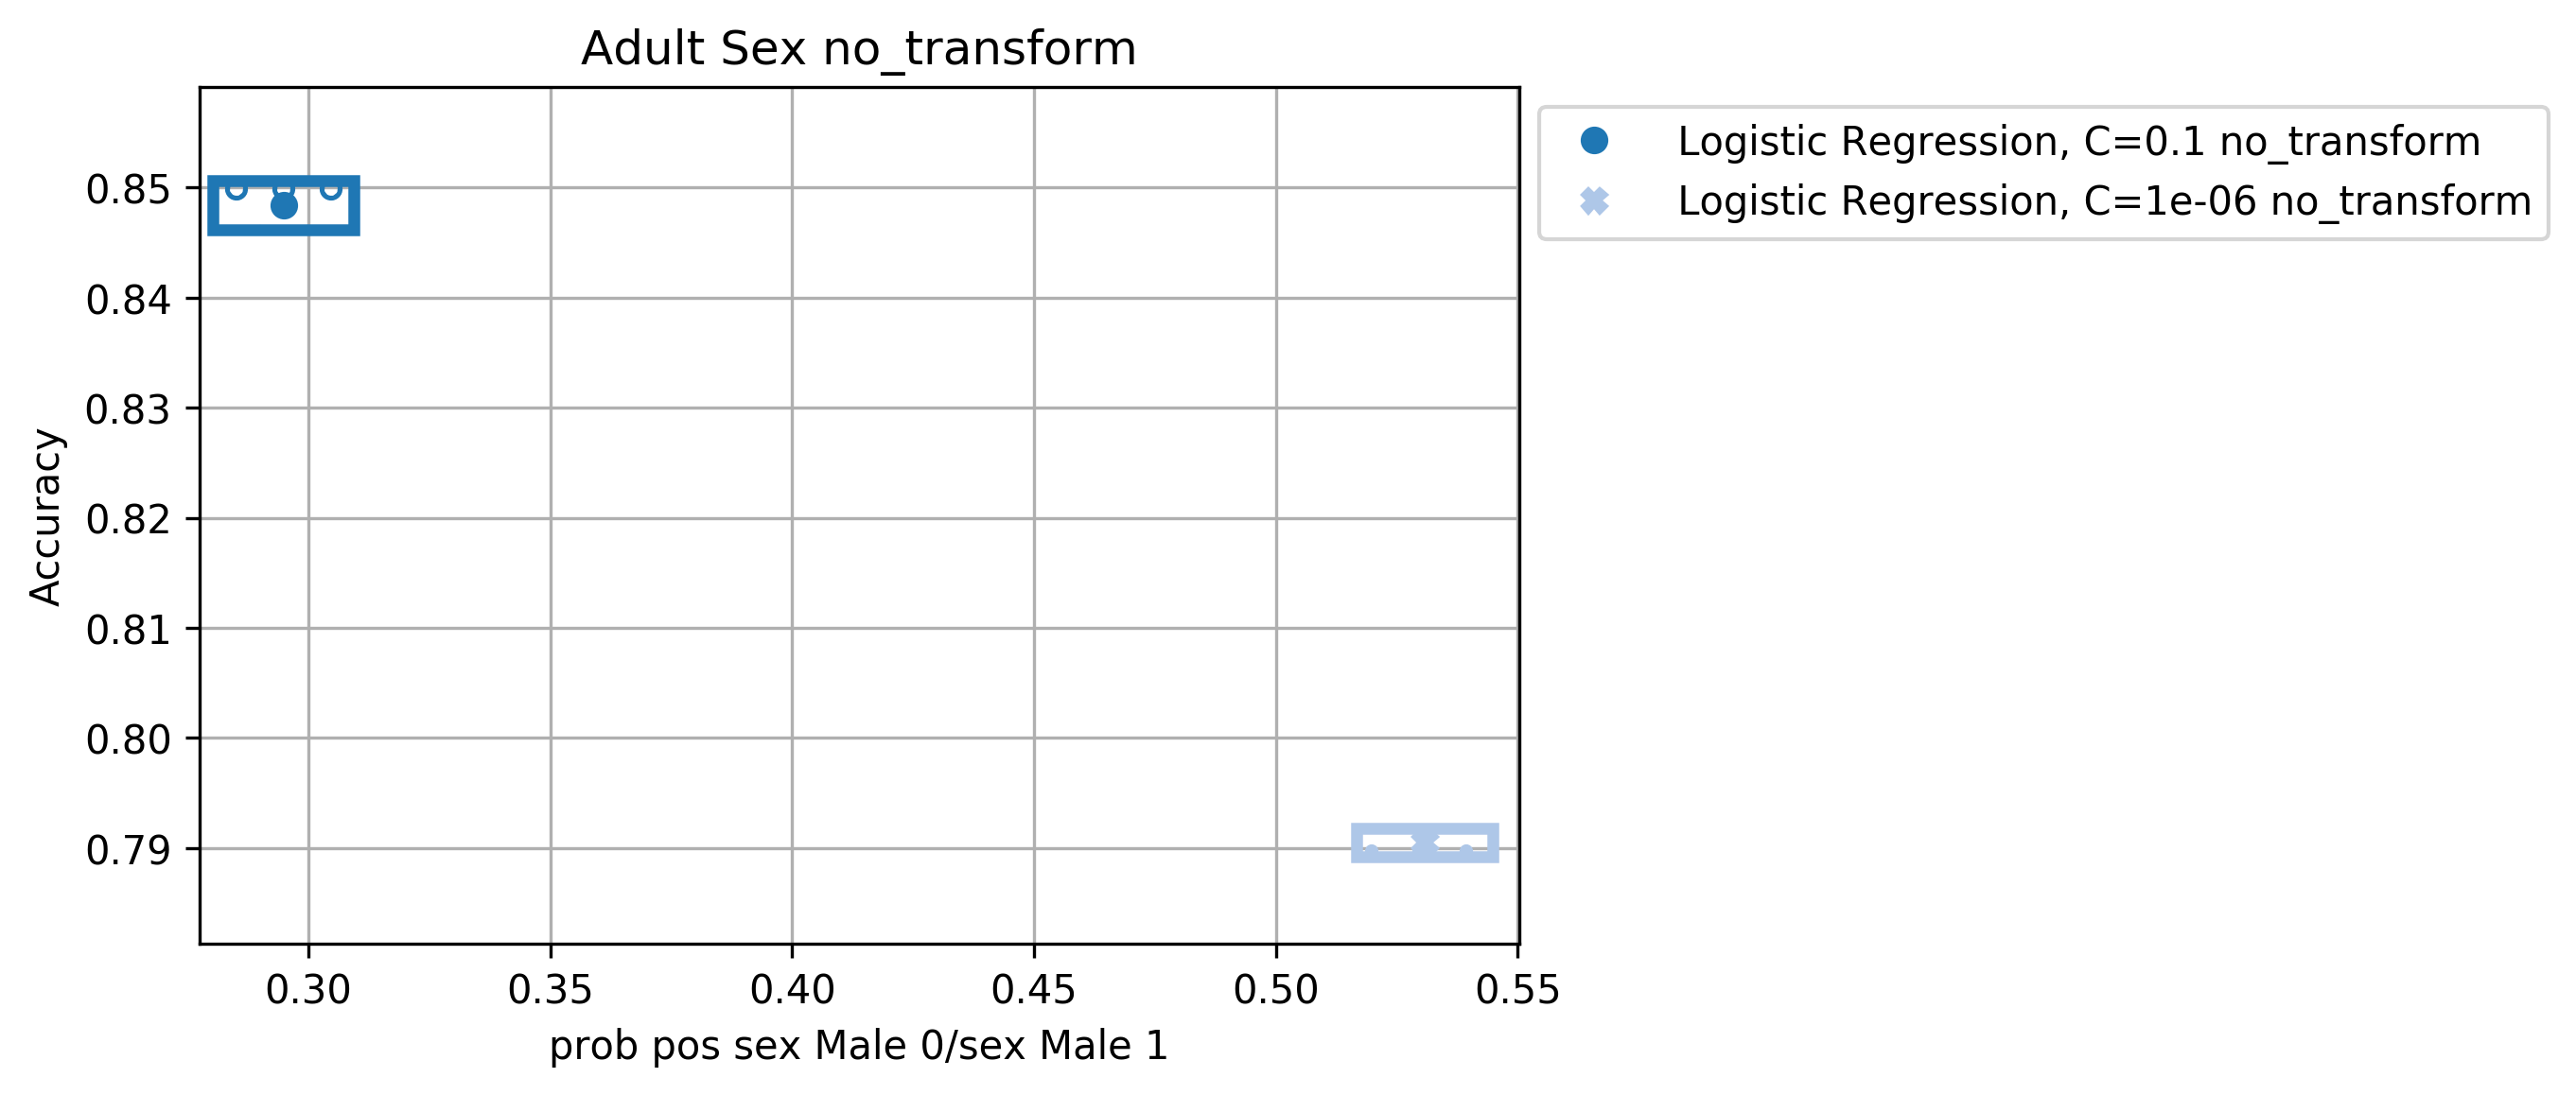

In [13]:
figs_plots = plot_mean_std_box(results_cv, Accuracy(), ProbPos(), save=False)
figs_plots[1][0]